In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import svm;
import numpy as np;
import matplotlib.pyplot as plt;
from DataParser import DataParser;
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
def train(train_data, train_labels):
    train_data = train_data.flatten()
    train_labels = train_labels.flatten()

    train_data = np.stack([train_data.real, train_data.imag], axis=-1)

    train_labels_real = train_labels.real > 0
    train_labels_imag = train_labels.imag > 0
    
    #Create a svm Classifier
    clf_real = svm.SVC(kernel='linear')
    clf_imag = svm.SVC(kernel='linear') 

    #Train the model using the training sets
    clf_real.fit(train_data, train_labels_real)
    clf_imag.fit(train_data, train_labels_imag)

    return (clf_real, clf_imag)


In [12]:
def predict(test_data, labels_data, model):
    clf_real, clf_imag = model
    test_data = test_data.flatten()

    test_data = np.stack([test_data.real, test_data.imag], axis=-1)

    test_labels_real = labels_data.real > 0
    test_labels_imag = labels_data.imag > 0

    labels_pred_real = clf_real.predict(test_data)
    labels_pred_imag = clf_imag.predict(test_data)

    labels_pred = np.where(labels_pred_real & labels_pred_imag, 1, np.where(~labels_pred_real & labels_pred_imag, 2, np.where(~labels_pred_real & ~labels_pred_imag, 3,np.where(labels_pred_real & ~labels_pred_imag, 4, 0))))

    test_labels = np.where(test_labels_real & test_labels_imag, 1,np.where(~test_labels_real & test_labels_imag, 2,np.where(~test_labels_real & ~test_labels_imag, 3,np.where(test_labels_real & ~test_labels_imag, 4, 0))))
    labels_pred = labels_pred.reshape((8, 25000))
    test_labels = test_labels.reshape((8, 25000))

    return labels_pred, test_labels

In [11]:
def visualize_data(predicted_labels, test_labels, allSNR=False, perSNR=False):
    if allSNR:
        ConfusionMatrixDisplay.from_predictions(test_labels.flatten(), predicted_labels.flatten(),)
        plt.title(f"Confusion matrix for all SNR values, accuracy: {np.mean(predicted_labels == test_labels)}")
        plt.show()
    if perSNR:
        accuracy = np.zeros(8)
        for i in range(8):
            accuracy[i] = np.mean(predicted_labels[i] == test_labels[i])
            ConfusionMatrixDisplay.from_predictions(test_labels[i].flatten(), predicted_labels[i].flatten(),)
            plt.title(f"Confusion matrix for SNR={dataSet.SNR[i]}, accuracy: {accuracy[i]}")
            plt.show()
        plt.plot(dataSet.SNR.values(), accuracy, marker="o")
        plt.title("Accuracy per SNR")
        plt.xlabel("SNR")
        plt.ylabel("Accuracy")

In [15]:
dataset = DataParser('../data/DataForML.mat')
train_data, train_labels = dataset.get_train_dataV1(True)
test_data, test_labels = dataset.get_test_dataV1(True)

model = train(train_data, train_labels)

labels_pred, test_labels = predict(model, test_data, test_labels)
visualize_data(labels_pred, test_labels, allSNR=True, perSNR=True)

ValueError: y should be a 1d array, got an array of shape (8, 20000) instead.

In [5]:
dataset = DataParser('../data/DataForML.mat')
train_data, train_labels = dataset.get_train_dataV1(True)
test_data, test_labels = dataset.get_test_dataV1(True)

train_data = train_data.flatten()
test_data = test_data.flatten()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

#Create a svm Classifier
clf_real = svm.SVC(kernel='linear')
clf_imag = svm.SVC(kernel='linear') 

train_data = np.stack([train_data.real, train_data.imag], axis=-1)
test_data = np.stack([test_data.real, test_data.imag], axis=-1)

train_labels_real = train_labels.real > 0
train_labels_imag = train_labels.imag > 0

test_labels_real = test_labels.real > 0
test_labels_imag = test_labels.imag > 0


In [6]:
#Train the model using the training sets
clf_real.fit(train_data, train_labels_real)
clf_imag.fit(train_data, train_labels_imag)

#Predict the response for test dataset
labels_pred = clf_real.predict(test_data) + 1j*clf_imag.predict(test_data)

In [7]:
labels_pred_real = labels_pred.real > 0
labels_pred_imag = labels_pred.imag > 0

labels_pred = np.column_stack((labels_pred_real, labels_pred_imag))
test_labels = np.column_stack((test_labels_real, test_labels_imag))

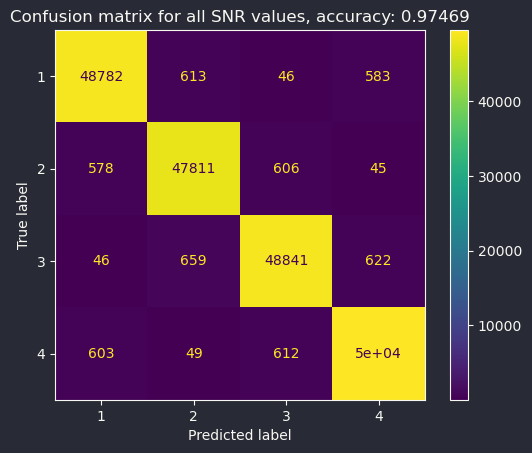

In [8]:
labels_pred = np.where(labels_pred_real & labels_pred_imag, 1,
                np.where(~labels_pred_real & labels_pred_imag, 2,
                         np.where(~labels_pred_real & ~labels_pred_imag, 3,
                                  np.where(labels_pred_real & ~labels_pred_imag, 4, 0))))

test_labels = np.where(test_labels_real & test_labels_imag, 1,
                np.where(~test_labels_real & test_labels_imag, 2,
                         np.where(~test_labels_real & ~test_labels_imag, 3,
                                  np.where(test_labels_real & ~test_labels_imag, 4, 0))))

ConfusionMatrixDisplay.from_predictions(test_labels.flatten(), labels_pred.flatten(),)
plt.title(f"Confusion matrix for all SNR values, accuracy: {np.mean(labels_pred == test_labels)}")
plt.show()

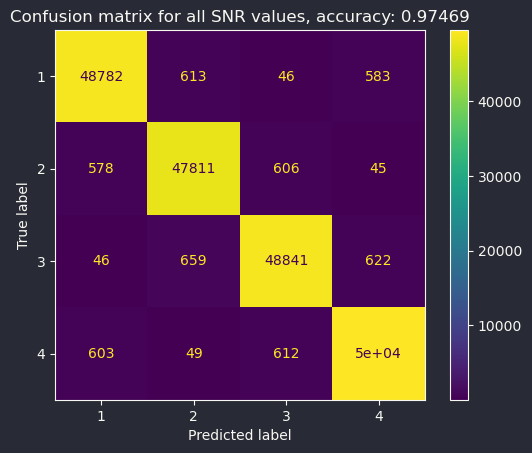

In [9]:
condition_labels_pred = (labels_pred_real << 1) | labels_pred_imag
condition_test_labels = (test_labels_real << 1) | test_labels_imag
labels_pred = np.select([condition_labels_pred == 0b11, condition_labels_pred == 0b01, condition_labels_pred == 0b00, condition_labels_pred == 0b10],
                [1, 2, 3, 4], default=0)
test_labels = np.select([condition_test_labels == 0b11, condition_test_labels == 0b01, condition_test_labels == 0b00, condition_test_labels == 0b10],
                [1, 2, 3, 4], default=0)
ConfusionMatrixDisplay.from_predictions(test_labels.flatten(), labels_pred.flatten(),)
plt.title(f"Confusion matrix for all SNR values, accuracy: {np.mean(labels_pred == test_labels)}")
plt.show()

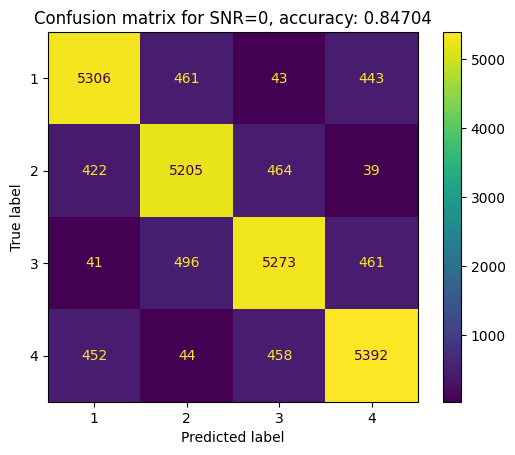

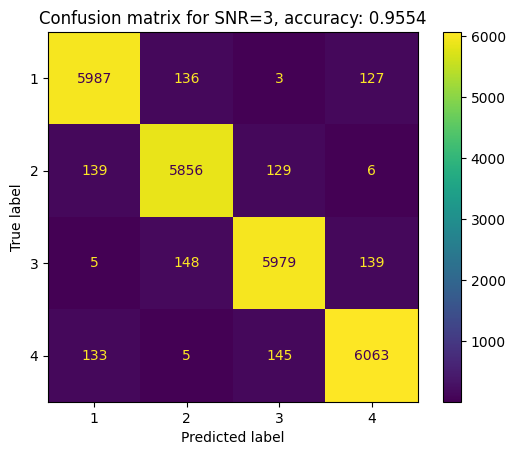

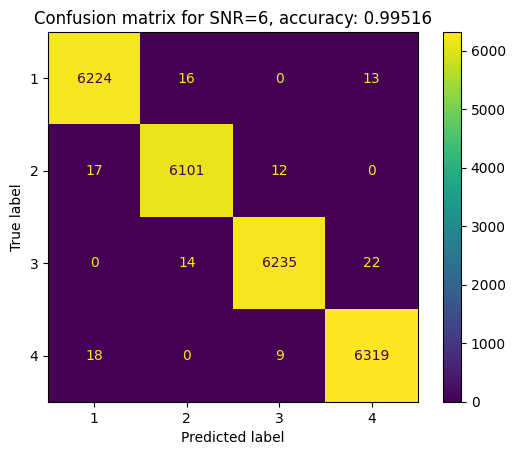

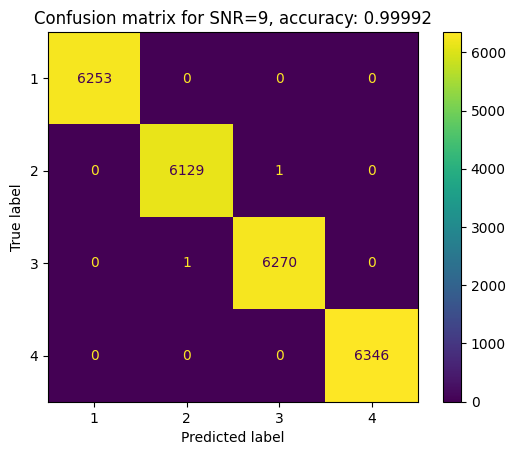

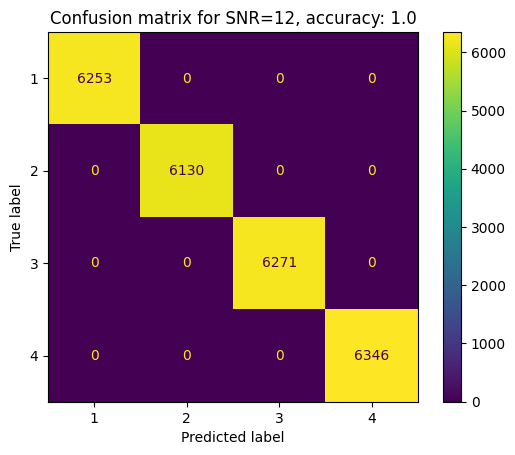

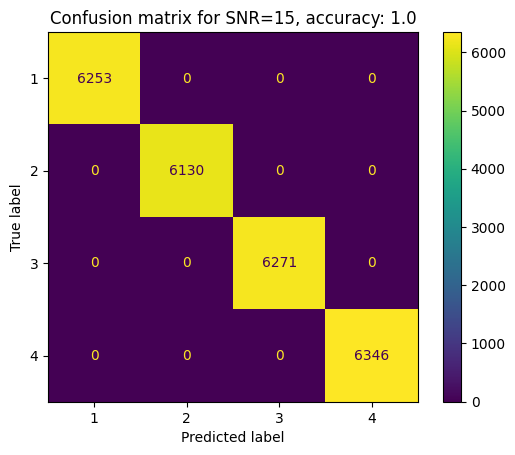

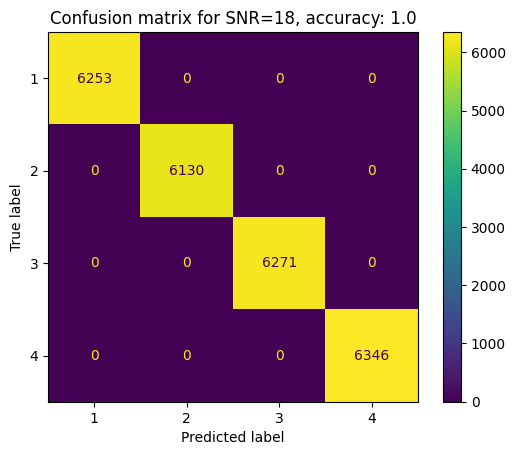

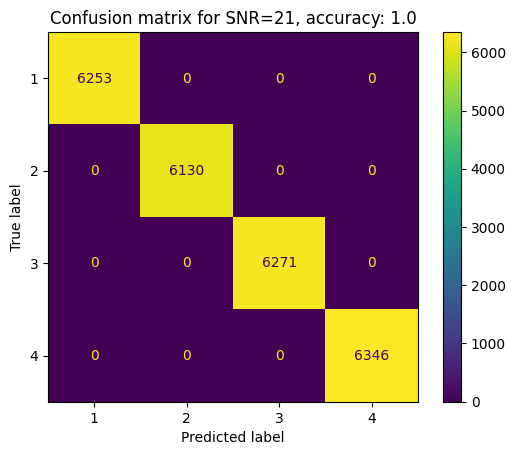

In [114]:
labels_pred = labels_pred.reshape((8, 25000))
test_labels = test_labels.reshape((8, 25000))

accuracy = np.zeros(8)
for i in range(8):
    accuracy[i] = np.mean(labels_pred[i] == test_labels[i])
    ConfusionMatrixDisplay.from_predictions(test_labels[i].flatten(), labels_pred[i].flatten(),)
    plt.title(f"Confusion matrix for SNR={dataset.SNR[i]}, accuracy: {accuracy[i]}")
    plt.show()